## Data and Sampling Distributions

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

loans_income = pd.read_csv(r'Data\loans_income.csv')
loans_income = list(loans_income['x'].astype(float))
len(loans_income)

50000

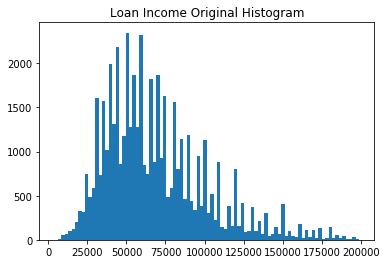

None

In [56]:
_ = plt.hist(loans_income, bins='auto')
plt.title("Loan Income Original Histogram")
display(plt.show())

# Bootstrapping Algorithm #
1. Draw a sample value, record, replace it.
2. Repeat $n$ times.
3. Record the mean of the $n$ resampled values.
4. Repeat steps 1–3 $R$ times.

Use the $R$ results to:
- Calculate their standard deviation (this estimates sample mean standard error).
- Produce a histogram or boxplot.
- Find a confidence interval.

Finding confidence interval:
1. Find the number of observations $n$, calculate their mean $\bar{x}$, and standard deviation $s$.
2. Decide what Confidence Interval we want: 95% or 99% are common choices. Then find the $Z$ value for that Confidence Interval.
3. Use that $Z$ in this formula for the Confidence Interval: $\bar{x} \mp Z\frac{s}{\sqrt{n}}$
4. For an $x$% confidence interval, trim $[(100-x) / 2]$% of the $R$ resample results from either end of the distribution.

In [68]:
sample_size = 5000
replications = 1000
samples = np.array([np.random.choice(loans_income, sample_size, replace = True) for _ in range(replications)])
sample_mean_array = np.mean(samples, axis=1)
standard_deviation = np.std(sample_mean_array)
sample_mean = np.mean(sample_mean_array)

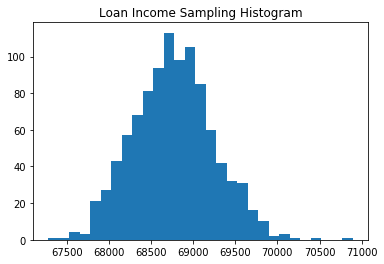

None

In [72]:
_ = plt.hist(sample_mean_array, bins='auto')
plt.title("Loan Income Sampling Histogram")
display(plt.show())

Find confidence interval using sample data with Normal distribution

$Z$ value = 1.960 (for 95%)

In [76]:
z_value = 1.960
sample_size = len(sample_mean_array )
low95_pct = sample_mean - z_value*(standard_deviation / math.sqrt(sample_size))
high95_pct = sample_mean + z_value*(standard_deviation / math.sqrt(sample_size))
np.array([low95_pct, sample_mean, high95_pct])

array([68739.50641919, 68768.8877854 , 68798.26915161])

Confidence Interval using Generic Formula @ 90%

In [74]:
np.percentile(sample_mean_array, [5, 50, 95])

array([67985.59301, 68760.1489 , 69578.3584 ])